<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analyis 
* Iterator

In [2]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 
import os
import re
from collections import defaultdict
from functools import reduce 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import prophet as pr

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'match_result_test.csv',
 'sample-sales-data.csv',
 'online_retail.xlsx',
 'test.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'sales_vs_discount.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales.csv',
 'ecommerce-data.csv',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 '1_order_payments_dataset.csv',
 'mock_sales_data.csv',
 'sample_data']

In [19]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [20]:
df.columns = df.iloc[0]
df.drop([0], axis = 0, inplace = True)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [21]:
df = df[df.order_status == 'Approved']
df['ds'] = df.transaction_date.to_numpy().astype('datetime64[D]')
df = df.groupby(['customer_id', 'ds'])['list_price'].sum().reset_index().rename(columns = {'customer_id':'id', 'list_price':'y'})
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,ds,y
0,1,2017-01-05,360.4
1,1,2017-02-21,71.49
2,1,2017-03-27,688.63
3,1,2017-03-29,1274.93
4,1,2017-04-06,1577.53


In [22]:
m = pr.Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphusm8g15/fnyesodc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphusm8g15/ajp67d17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73582', 'data', 'file=/tmp/tmphusm8g15/fnyesodc.json', 'init=/tmp/tmphusm8g15/ajp67d17.json', 'output', 'file=/tmp/tmphusm8g15/prophet_modeli18__xay/prophet_model-20221106232517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:25:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:25:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [26]:
future = m.make_future_dataframe(periods = 60)
future.tail()

,ds
419,2018-02-24
420,2018-02-25
421,2018-02-26
422,2018-02-27
423,2018-02-28


In [27]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
419,2018-02-24,1093.950781,346.864086,1924.682757,1093.056560,1094.940937,15.886646,15.886646,15.886646,15.886646,15.886646,15.886646,0.0,0.0,0.0,1109.837427
420,2018-02-25,1093.841657,292.513958,1761.437798,1092.926885,1094.837333,-8.473431,-8.473431,-8.473431,-8.473431,-8.473431,-8.473431,0.0,0.0,0.0,1085.368226
421,2018-02-26,1093.732533,329.524829,1810.074635,1092.795793,1094.746275,-7.905768,-7.905768,-7.905768,-7.905768,-7.905768,-7.905768,0.0,0.0,0.0,1085.826766
422,2018-02-27,1093.623410,339.320826,1852.461940,1092.658914,1094.662139,-4.072083,-4.072083,-4.072083,-4.072083,-4.072083,-4.072083,0.0,0.0,0.0,1089.551327
423,2018-02-28,1093.514286,358.444811,1847.406598,1092.527794,1094.588274,10.597663,10.597663,10.597663,10.597663,10.597663,10.597663,0.0,0.0,0.0,1104.111949


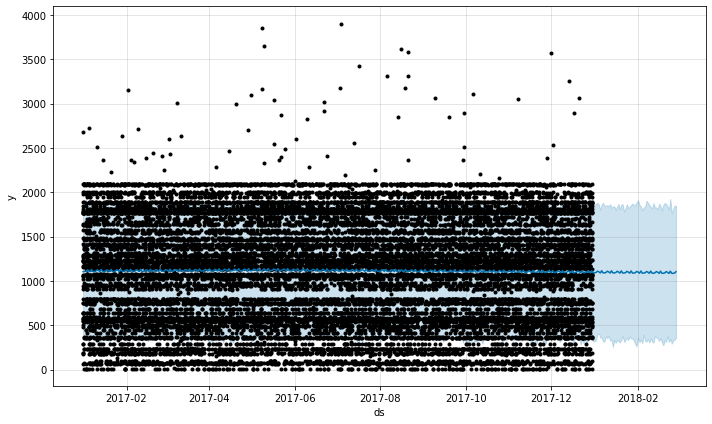

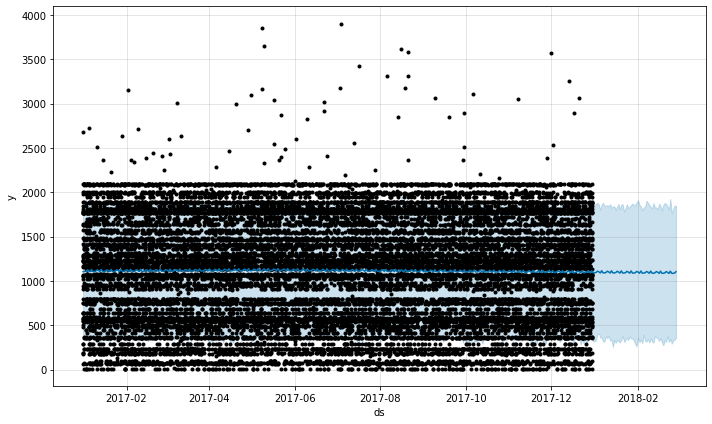

In [28]:
m.plot(forecast)

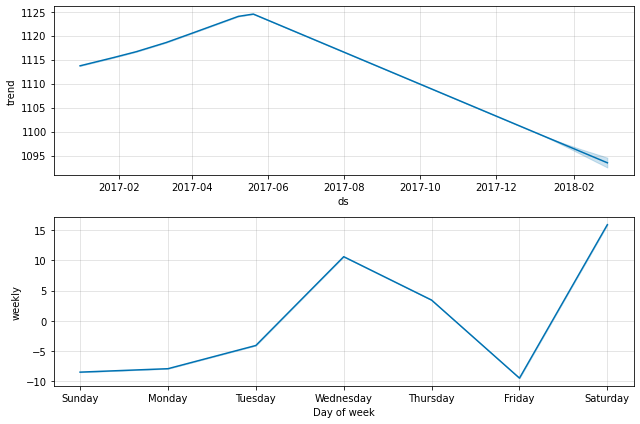

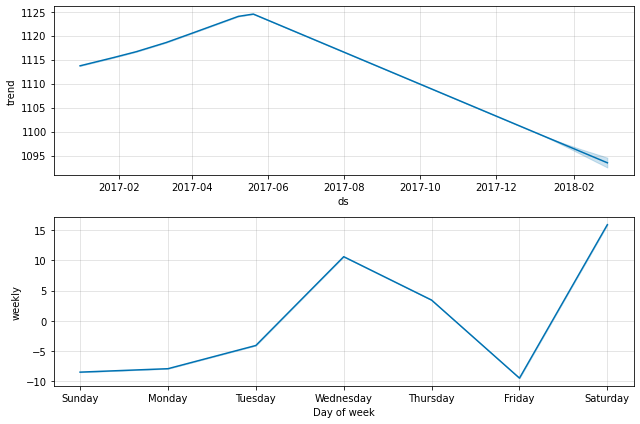

In [29]:
m.plot_components(forecast)

In [30]:
os.listdir()

['.config',
 'match_result_test.csv',
 'sample-sales-data.csv',
 'online_retail.xlsx',
 'test.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'sales_vs_discount.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales.csv',
 'ecommerce-data.csv',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 '1_order_payments_dataset.csv',
 'mock_sales_data.csv',
 'sample_data']

In [31]:
df = pd.read_csv('sales_vs_discount.csv')
df.head()

,date,product,sales_amount,discount
0,2021-04-02,1014,261.241,0.0
1,2021-04-03,1014,271.223,0.0
2,2021-04-04,1014,227.140,0.0
3,2021-04-05,1014,203.027,0.0
4,2021-04-06,1014,242.594,0.0


In [35]:
df['date'] = df['date'].to_numpy().astype('datetime64[D]')
df = df.groupby(['date'])['sales_amount'].sum().reset_index().rename(columns = {'date':'ds','sales_amount':'y'})
df.head()

,ds,y
0,2021-04-02,261.241
1,2021-04-03,271.223
2,2021-04-04,227.140
3,2021-04-05,203.027
4,2021-04-06,242.594


In [36]:
m = pr.Prophet()
m.fit

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphusm8g15/javmektq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphusm8g15/54xm42ul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85660', 'data', 'file=/tmp/tmphusm8g15/javmektq.json', 'init=/tmp/tmphusm8g15/54xm42ul.json', 'output', 'file=/tmp/tmphusm8g15/prophet_model8ibrnnd5/prophet_model-20221106232852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:28:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:28:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
future = m.make_future_dataframe(periods = 60)
forecast = m.predict(future)

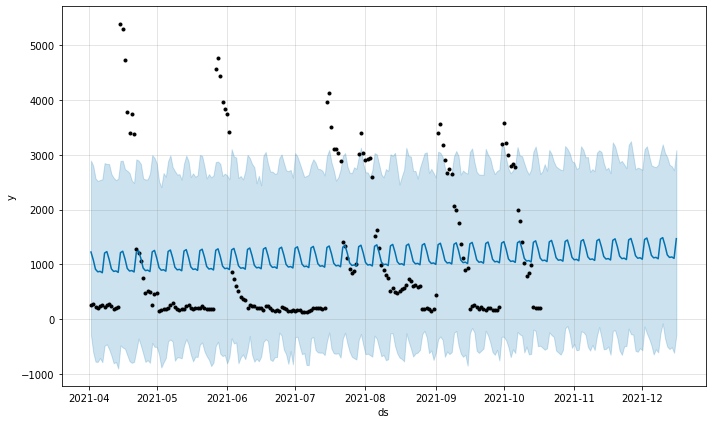

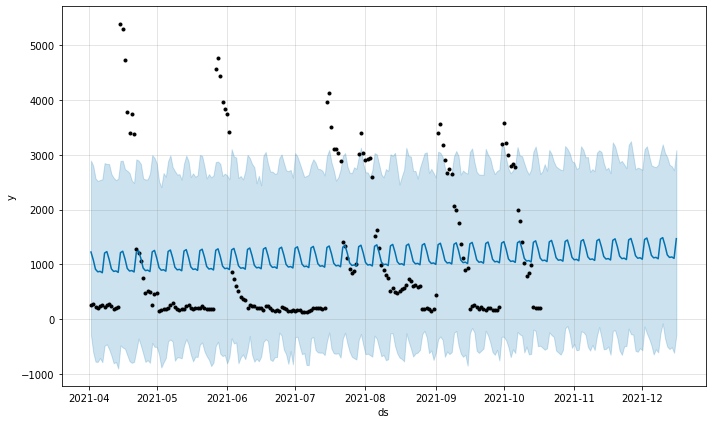

In [38]:
m.plot(forecast)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphusm8g15/m3ncd0uq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphusm8g15/41clxy5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31982', 'data', 'file=/tmp/tmphusm8g15/m3ncd0uq.json', 'init=/tmp/tmphusm8g15/41clxy5r.json', 'output', 'file=/tmp/tmphusm8g15/prophet_modelmk6t2pdj/prophet_model-20221106234732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:47:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:47:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


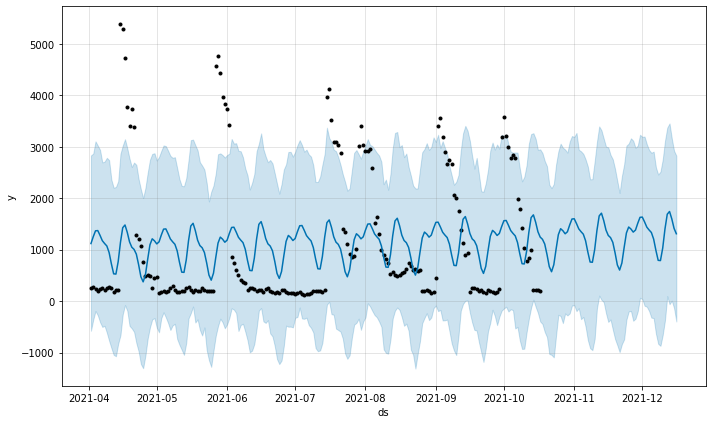

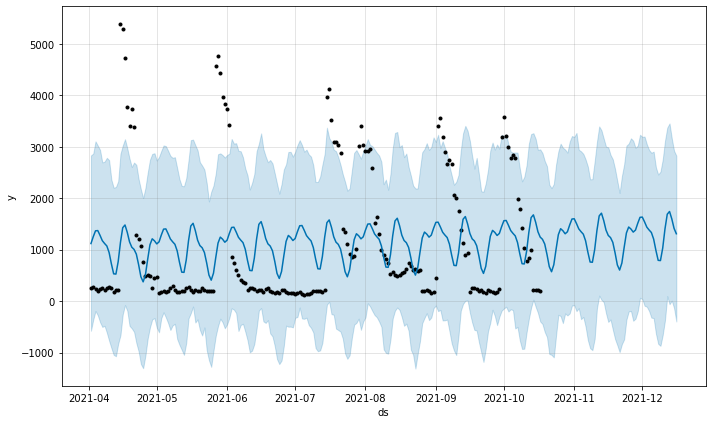

In [42]:
m = pr.Prophet(weekly_seasonality=False)
m.add_seasonality(name = 'yearly', period = 30, fourier_order=5)
forecast = m.fit(df).predict(future)
m.plot(forecast)

# Iterator

In [43]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [44]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}